# Phase 1 - Week 1 - Day 4 PM - Polynomial & Logistic Regression

# A. Regularization

**Linear Regression**
* This method is linear regression’s most basic state, and, in this method, **the model is not penalized** for the weights.
* It means that if the model senses that one specific feature is particularly crucial within the training stage, it may assign considerable weight to that particular feature.
* This method can lead to overfitting in small data sets, which means the model performs better on the training set than on the test set.

**Lasso Regression**
* This method is an altered version of linear regression, and the model is **penalized for the aggregate of the weight’s absolute value**.
* As a result, the weight’s total value is usually reduced, and many values may even be zero.

**Ridge Regression**
* This method **penalizes the model for aggregating the weight’s squared value**.
* As a result, the weights generally have smaller absolute values.
* Furthermore, they penalize the extreme values of the weights, which leads to a group of weights that are more uniformly distributed.

**ElasticNet Regression**
* ElasticNet is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, being regulated with another coefficient.
* This allows for a balance between feature selection (like Lasso) and coefficient shrinkage (like Ridge).

In Lasso Regression, Ridge Regression, and ElasticNet Regression the hyperparameter `alpha` (α) plays a significant role in controlling the balance between fitting the training data well and preventing overfitting. The effect of high and low values of `alpha` is as follows:

1. **Low `Alpha`**
   - When `alpha` is very close to `0` (or effectively `0`), the regularization term has minimal impact on the cost function and tends to produce similar coefficients to those of simple linear regression.
   - It can leads to overfitting if the features are highly correlated or if the dataset is small.
   - Useful when you have a large amount of data
   - Useful when you that multicollinearity is not a significant issue.

2. **High `Alpha`**
   - Stronger regularization
   - Have smaller coefficient values
   - Less likely to overfit the training data, even when features are highly correlated.
   - Useful when you have a smaller dataset
   - Useful when you suspect that multicollinearity might be an issue.

## A.1 - Data Loading & Feature Engineering

For this tutorial, we will use movie attributes to predict its rating same as previous session. The following is the information of the dataset.

| Column | Description |
| --- | --- |
| Avg_age_actors | The average age of the actors |
| Marketing_expense | Marketing cost of the film (USD) |
| Wardrobe_expense | Production cost of the film (USD) |
| Budget | Total budget to produce the film (USD) |
| Lead_actor_rating | Rating of the main actors in the film (scale : 0 - 10) |
| Lead_actress_rating | Rating of the main actress in the film (scale : 0 - 10) |
| Director_rating | Rating of a director (scale : 0 - 10) |
| Producer_rating | Rating of a producer (scale : 0 - 10) |
| Movie_length | Duration of the movie (in minute) |
| Trailer_views | The number of viewers who watched the trailer on YouTube |
| Twitter_hastags | The number of tweets that contain hashtags related to the film |
| Total_cinemas | The number of movie theatres showing the film worldwide |
| Movie_rating | Rating given to the film by the audience (scale : 0 - 10) |

We will also use same features and compare the result to Linear Regression as was done in the previous session

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Data Loading

movie_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Movie%20Ratings.csv')
movie_df

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,138.7,527367,22384,49400,7.94
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,152.4,494055,24346,46200,7.44
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,134.6,547051,202240,45800,7.44
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,119.3,516279,22534,47200,8.26
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,127.7,531448,22579,39500,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,142.6,492480,24358,56100,6.80
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,150.2,482875,26330,60000,7.80
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,164.5,532239,24382,57600,7.80
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,162.8,496077,30352,60700,6.80


In [3]:
# Splitting between `X` and `y`

X = movie_df.drop(['Movie_rating'], axis=1)
y = movie_df['Movie_rating']
X

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,138.7,527367,22384,49400
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,152.4,494055,24346,46200
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,134.6,547051,202240,45800
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,119.3,516279,22534,47200
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,127.7,531448,22579,39500
...,...,...,...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,142.6,492480,24358,56100
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,150.2,482875,26330,60000
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,164.5,532239,24382,57600
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,162.8,496077,30352,60700


Recall that in the previous session, there were several features that were removed, namely `Total_cinemas`, `Trailer_views`, and `Movie_length`.

In [4]:
# Drop column `Total_cinemas`, `Trailer_views`, and `Movie_length`

X = X.drop(['Total_cinemas', 'Trailer_views', 'Movie_length'], axis=1)
X

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Twitter_hastags
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,22384
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,24346
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,202240
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,22534
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,22579
...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,24358
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,26330
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,24382
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,30352


In [5]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (354, 9)
Test size  :  (152, 9)


In [6]:
# Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.35316618, -0.2073549 ,  1.54801583, ...,  1.06920955,
         1.1990716 , -0.18038252],
       [ 0.10657678, -0.38886483, -0.58974728, ..., -0.09313587,
        -0.15810074, -0.00511985],
       [-0.14001263, -0.33573237,  1.54801583, ...,  0.77500594,
         0.84649658, -0.33779436],
       ...,
       [-0.87978085, -0.38450106, -0.15303077, ...,  0.48562534,
         0.37317669,  0.31270602],
       [ 0.43536265, -0.37512016, -0.59690657, ..., -0.8792865 ,
        -0.9453573 , -0.17746148],
       [-0.05781616, -0.38592169, -1.00641779, ...,  0.57726253,
         0.56153869, -0.1690229 ]])

## A.2 - Linear Regression

First, we will try to build model using Linear Regression.

In [7]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# Create a function to calculate the evaluation results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 5))
  eval_results['MAE - Test'].append(round(mae_test, 5))
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [9]:
# Evaluate the model

model_evaluation('Linear Regression', model_linreg, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression
MAE - Train,0.53877
MAE - Test,0.56163
MSE - Train,0.38672
MSE - Test,0.41256
RMSE - Train,0.62187
RMSE - Test,0.64231
R2 Score - Train,0.10966
R2 Score - Test,0.04797


## A.3 - Lasso Regression (L1)

In [10]:
# Training using Lasso Regression - with alpha=0.01
from sklearn.linear_model import Lasso

model_lasso_alpha_01 = Lasso(alpha=0.01)
model_lasso_alpha_01.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('Lasso with alpha=0.01', model_lasso_alpha_01, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01
MAE - Train,0.53877,0.53979
MAE - Test,0.56163,0.55930
MSE - Train,0.38672,0.38842
MSE - Test,0.41256,0.41057
RMSE - Train,0.62187,0.62323
RMSE - Test,0.64231,0.64076
R2 Score - Train,0.10966,0.10576
R2 Score - Test,0.04797,0.05256


In [11]:
# Training using Lasso Regression - with alpha=10
from sklearn.linear_model import Lasso

model_lasso_alpha_10 = Lasso(alpha=10)
model_lasso_alpha_10.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('Lasso with alpha=10', model_lasso_alpha_10, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10
MAE - Train,0.53877,0.53979,0.54581
MAE - Test,0.56163,0.55930,0.55440
MSE - Train,0.38672,0.38842,0.43435
MSE - Test,0.41256,0.41057,0.43474
RMSE - Train,0.62187,0.62323,0.65905
RMSE - Test,0.64231,0.64076,0.65935
R2 Score - Train,0.10966,0.10576,0.00000
R2 Score - Test,0.04797,0.05256,-0.00321


In [12]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', model_linreg.coef_)
print('Intercept    : ', model_linreg.intercept_)
print('')

print('Lasso Regression - alpha=0.01')
print('Coefficients : ', model_lasso_alpha_01.coef_)
print('Intercept    : ', model_lasso_alpha_01.intercept_)
print('')

print('Lasso Regression - alpha=10.0')
print('Coefficients : ', model_lasso_alpha_10.coef_)
print('Intercept    : ', model_lasso_alpha_10.intercept_)
print('')

Linear Regression
Coefficients :  [-0.02100676 -0.0519064  -0.13805475  0.11297921 -0.32698035  0.3160065
  0.20039954 -0.15484235 -0.01778283]
Intercept    :  7.799661016949151

Lasso Regression - alpha=0.01
Coefficients :  [-0.01014155 -0.0400657  -0.1057816   0.11385585  0.          0.
  0.          0.         -0.00841796]
Intercept    :  7.799661016949151

Lasso Regression - alpha=10.0
Coefficients :  [-0. -0. -0.  0. -0. -0. -0. -0. -0.]
Intercept    :  7.799661016949151



It can be seen that Lasso Regression will make some coefficients become `0`. The greater the alpha value, the greater the penalty given which can result in more coefficients having a value of `0`.

## A.4 - Ridge Regression (L2)

In [13]:
# Training using Ridge Regression - with alpha=1.0
from sklearn.linear_model import Ridge

model_ridge_alpha_1 = Ridge(alpha=1.0)
model_ridge_alpha_1.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('Ridge with alpha=1', model_ridge_alpha_1, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10,Ridge with alpha=1
MAE - Train,0.53877,0.53979,0.54581,0.53896
MAE - Test,0.56163,0.55930,0.55440,0.56205
MSE - Train,0.38672,0.38842,0.43435,0.38691
MSE - Test,0.41256,0.41057,0.43474,0.41310
RMSE - Train,0.62187,0.62323,0.65905,0.62202
RMSE - Test,0.64231,0.64076,0.65935,0.64273
R2 Score - Train,0.10966,0.10576,0.00000,0.10923
R2 Score - Test,0.04797,0.05256,-0.00321,0.04673


In [14]:
# Training using Ridge Regression - with alpha=100.0
from sklearn.linear_model import Ridge

model_ridge_alpha_100 = Ridge(alpha=100.0)
model_ridge_alpha_100.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('Ridge with alpha=100', model_ridge_alpha_100, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10,Ridge with alpha=1,Ridge with alpha=100
MAE - Train,0.53877,0.53979,0.54581,0.53896,0.53915
MAE - Test,0.56163,0.55930,0.55440,0.56205,0.55768
MSE - Train,0.38672,0.38842,0.43435,0.38691,0.38916
MSE - Test,0.41256,0.41057,0.43474,0.41310,0.40830
RMSE - Train,0.62187,0.62323,0.65905,0.62202,0.62382
RMSE - Test,0.64231,0.64076,0.65935,0.64273,0.63898
R2 Score - Train,0.10966,0.10576,0.00000,0.10923,0.10405
R2 Score - Test,0.04797,0.05256,-0.00321,0.04673,0.05780


In [15]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', model_linreg.coef_)
print('Intercept    : ', model_linreg.intercept_)
print('')

print('Ridge Regression - alpha=1.0')
print('Coefficients : ', model_ridge_alpha_1.coef_)
print('Intercept    : ', model_ridge_alpha_1.intercept_)
print('')

print('Ridge Regression - alpha=100.0')
print('Coefficients : ', model_ridge_alpha_100.coef_)
print('Intercept    : ', model_ridge_alpha_100.intercept_)
print('')

Linear Regression
Coefficients :  [-0.02100676 -0.0519064  -0.13805475  0.11297921 -0.32698035  0.3160065
  0.20039954 -0.15484235 -0.01778283]
Intercept    :  7.799661016949151

Ridge Regression - alpha=1.0
Coefficients :  [-0.02021597 -0.05116174 -0.13412165  0.11526778 -0.12603359  0.15780745
  0.11503499 -0.11470918 -0.01866126]
Intercept    :  7.799661016949151

Ridge Regression - alpha=100.0
Coefficients :  [-0.01623581 -0.04458301 -0.09253584  0.09980576 -0.00200833  0.00290181
  0.00211262 -0.00432743 -0.01377582]
Intercept    :  7.799661016949151



You can see that the coefficient gets smaller as the alpha value increases.

## A.4 - ElasticNet Regression

Besides `alpha`, in ElasticNet there is hyperparameter called `l1_ratio`.

```
l1_ratiofloat, default=0.5

    The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1.
    For l1_ratio = 0 the penalty is an L2 penalty.
    For l1_ratio = 1 it is an L1 penalty.
    For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
```

In [16]:
# Training using ElasticNet Regression - with alpha=0.01 and l1_ratio=0.2
from sklearn.linear_model import ElasticNet

model_elasticnet_v1 = ElasticNet(alpha=0.01, l1_ratio=0.2)
model_elasticnet_v1.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('ElasticNet with alpha=0.01 & l1_ratio=0.2', model_elasticnet_v1, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10,Ridge with alpha=1,Ridge with alpha=100,ElasticNet with alpha=0.01 & l1_ratio=0.2
MAE - Train,0.53877,0.53979,0.54581,0.53896,0.53915,0.53963
MAE - Test,0.56163,0.55930,0.55440,0.56205,0.55768,0.56122
MSE - Train,0.38672,0.38842,0.43435,0.38691,0.38916,0.38755
MSE - Test,0.41256,0.41057,0.43474,0.41310,0.40830,0.41234
RMSE - Train,0.62187,0.62323,0.65905,0.62202,0.62382,0.62254
RMSE - Test,0.64231,0.64076,0.65935,0.64273,0.63898,0.64214
R2 Score - Train,0.10966,0.10576,0.00000,0.10923,0.10405,0.10774
R2 Score - Test,0.04797,0.05256,-0.00321,0.04673,0.05780,0.04848


In [17]:
# Training using Ridge Regression - with alpha=0.01 and l1_ratio=0.8
from sklearn.linear_model import ElasticNet

model_elasticnet_v2 = ElasticNet(alpha=0.01, l1_ratio=0.8)
model_elasticnet_v2.fit(X_train_scaled, y_train)

# Evaluate the model
model_evaluation('ElasticNet with alpha=0.01 & l1_ratio=0.8', model_elasticnet_v2, X_train_scaled, X_test_scaled, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,Lasso with alpha=0.01,Lasso with alpha=10,Ridge with alpha=1,Ridge with alpha=100,ElasticNet with alpha=0.01 & l1_ratio=0.2,ElasticNet with alpha=0.01 & l1_ratio=0.8
MAE - Train,0.53877,0.53979,0.54581,0.53896,0.53915,0.53963,0.53975
MAE - Test,0.56163,0.55930,0.55440,0.56205,0.55768,0.56122,0.55970
MSE - Train,0.38672,0.38842,0.43435,0.38691,0.38916,0.38755,0.38811
MSE - Test,0.41256,0.41057,0.43474,0.41310,0.40830,0.41234,0.41091
RMSE - Train,0.62187,0.62323,0.65905,0.62202,0.62382,0.62254,0.62299
RMSE - Test,0.64231,0.64076,0.65935,0.64273,0.63898,0.64214,0.64102
R2 Score - Train,0.10966,0.10576,0.00000,0.10923,0.10405,0.10774,0.10645
R2 Score - Test,0.04797,0.05256,-0.00321,0.04673,0.05780,0.04848,0.05178


In [18]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', model_linreg.coef_)
print('Intercept    : ', model_linreg.intercept_)
print('')

print('ElasticNet Regression - alpha=0.01 & l1_ratio=0.2')
print('Coefficients : ', model_elasticnet_v1.coef_)
print('Intercept    : ', model_elasticnet_v1.intercept_)
print('')

print('ElasticNet Regression - alpha=0.01 & l1_ratio=0.8')
print('Coefficients : ', model_elasticnet_v2.coef_)
print('Intercept    : ', model_elasticnet_v2.intercept_)
print('')

Linear Regression
Coefficients :  [-0.02100676 -0.0519064  -0.13805475  0.11297921 -0.32698035  0.3160065
  0.20039954 -0.15484235 -0.01778283]
Intercept    :  7.799661016949151

ElasticNet Regression - alpha=0.01 & l1_ratio=0.2
Coefficients :  [-0.01747663 -0.04822354 -0.12545043  0.11620469  0.          0.023085
  0.00120073 -0.         -0.01664534]
Intercept    :  7.799661016949151

ElasticNet Regression - alpha=0.01 & l1_ratio=0.8
Coefficients :  [-0.01199111 -0.04204921 -0.11040832  0.11448541  0.          0.00559491
  0.          0.         -0.01048717]
Intercept    :  7.799661016949151



You can see that the coefficient gets smaller as the alpha value increases.

# B. Polynomial Regression

Let's try to solve our previous problem with Polynomial Regression.

**Step 1**

We will convert the dataset into polynomial features using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from Scikit-Learn.

**Step 2** :
* Training with Linear Regression, Lasso Regression, Ridge Regression, and ElasticNet Regression algorithms.

* Even if trained using a linear algorithm, because the features have been converted to polynomials, the algorithm can create non-linear models.

In [19]:
# Convert into PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly_d2 = PolynomialFeatures(degree=2)
X_train_poly_d2 = poly_d2.fit_transform(X_train)
X_test_poly_d2 = poly_d2.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train_poly_d2)

X_train_scaled_poly_d2 = scaler.transform(X_train_poly_d2)
X_test_scaled_poly_d2 = scaler.transform(X_test_poly_d2)

In [20]:
# Training using Linear Regression

model_linreg_poly_d2 = LinearRegression()
model_linreg_poly_d2.fit(X_train_scaled_poly_d2, y_train)

# Evaluate the model
model_evaluation('Polynomial - Linear Regression',
                 model_linreg_poly_d2,
                 X_train_scaled_poly_d2,
                 X_test_scaled_poly_d2,
                 y_train,
                 y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,name,MAE - Train,MAE - Test,MSE - Train,MSE - Test,RMSE - Train,RMSE - Test,R2 Score - Train,R2 Score - Test
0,Linear Regression,0.53877,0.56163,0.38672,0.41256,0.62187,0.64231,0.10966,0.04797
1,Lasso with alpha=0.01,0.53979,0.55930,0.38842,0.41057,0.62323,0.64076,0.10576,0.05256
2,Lasso with alpha=10,0.54581,0.55440,0.43435,0.43474,0.65905,0.65935,0.00000,-0.00321
3,Ridge with alpha=1,0.53896,0.56205,0.38691,0.41310,0.62202,0.64273,0.10923,0.04673
4,Ridge with alpha=100,0.53915,0.55768,0.38916,0.40830,0.62382,0.63898,0.10405,0.05780
5,ElasticNet with alpha=0.01 & l1_ratio=0.2,0.53963,0.56122,0.38755,0.41234,0.62254,0.64214,0.10774,0.04848
6,ElasticNet with alpha=0.01 & l1_ratio=0.8,0.53975,0.55970,0.38811,0.41091,0.62299,0.64102,0.10645,0.05178
7,Polynomial - Linear Regression,0.49854,0.61036,0.34097,0.53562,0.58392,0.73186,0.21500,-0.23601


In [21]:
# Training using Lasso Regression - with alpha=0.01
from sklearn.linear_model import Lasso

model_lasso_alpha_01_poly_d2 = Lasso(alpha=0.01)
model_lasso_alpha_01_poly_d2.fit(X_train_scaled_poly_d2, y_train)

# Evaluate the model
model_evaluation('Polynomial - Lasso with alpha=0.01',
                 model_lasso_alpha_01_poly_d2,
                 X_train_scaled_poly_d2,
                 X_test_scaled_poly_d2,
                 y_train,
                 y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,name,MAE - Train,MAE - Test,MSE - Train,MSE - Test,RMSE - Train,RMSE - Test,R2 Score - Train,R2 Score - Test
0,Linear Regression,0.53877,0.56163,0.38672,0.41256,0.62187,0.64231,0.10966,0.04797
1,Lasso with alpha=0.01,0.53979,0.55930,0.38842,0.41057,0.62323,0.64076,0.10576,0.05256
2,Lasso with alpha=10,0.54581,0.55440,0.43435,0.43474,0.65905,0.65935,0.00000,-0.00321
3,Ridge with alpha=1,0.53896,0.56205,0.38691,0.41310,0.62202,0.64273,0.10923,0.04673
4,Ridge with alpha=100,0.53915,0.55768,0.38916,0.40830,0.62382,0.63898,0.10405,0.05780
5,ElasticNet with alpha=0.01 & l1_ratio=0.2,0.53963,0.56122,0.38755,0.41234,0.62254,0.64214,0.10774,0.04848
6,ElasticNet with alpha=0.01 & l1_ratio=0.8,0.53975,0.55970,0.38811,0.41091,0.62299,0.64102,0.10645,0.05178
7,Polynomial - Linear Regression,0.49854,0.61036,0.34097,0.53562,0.58392,0.73186,0.21500,-0.23601
8,Polynomial - Lasso with alpha=0.01,0.53662,0.56212,0.38017,0.41351,0.61658,0.64305,0.12475,0.04578


In [22]:
# Training using Ridge Regression - with alpha=100.0
from sklearn.linear_model import Ridge

model_ridge_alpha_100_poly_d2 = Ridge(alpha=100.0)
model_ridge_alpha_100_poly_d2.fit(X_train_scaled_poly_d2, y_train)

# Evaluate the model
model_evaluation('Polynomial - Ridge with alpha=100',
                 model_ridge_alpha_100_poly_d2,
                 X_train_scaled_poly_d2,
                 X_test_scaled_poly_d2,
                 y_train,
                 y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,name,MAE - Train,MAE - Test,MSE - Train,MSE - Test,RMSE - Train,RMSE - Test,R2 Score - Train,R2 Score - Test
0,Linear Regression,0.53877,0.56163,0.38672,0.41256,0.62187,0.64231,0.10966,0.04797
1,Lasso with alpha=0.01,0.53979,0.55930,0.38842,0.41057,0.62323,0.64076,0.10576,0.05256
2,Lasso with alpha=10,0.54581,0.55440,0.43435,0.43474,0.65905,0.65935,0.00000,-0.00321
3,Ridge with alpha=1,0.53896,0.56205,0.38691,0.41310,0.62202,0.64273,0.10923,0.04673
4,Ridge with alpha=100,0.53915,0.55768,0.38916,0.40830,0.62382,0.63898,0.10405,0.05780
5,ElasticNet with alpha=0.01 & l1_ratio=0.2,0.53963,0.56122,0.38755,0.41234,0.62254,0.64214,0.10774,0.04848
6,ElasticNet with alpha=0.01 & l1_ratio=0.8,0.53975,0.55970,0.38811,0.41091,0.62299,0.64102,0.10645,0.05178
7,Polynomial - Linear Regression,0.49854,0.61036,0.34097,0.53562,0.58392,0.73186,0.21500,-0.23601
8,Polynomial - Lasso with alpha=0.01,0.53662,0.56212,0.38017,0.41351,0.61658,0.64305,0.12475,0.04578
9,Polynomial - Ridge with alpha=100,0.53710,0.56203,0.38364,0.41248,0.61939,0.64225,0.11675,0.04815


In [23]:
# Training using ElasticNet Regression - with alpha=0.01 and l1_ratio=0.8
model_elasticnet_v3 = ElasticNet(alpha=0.01, l1_ratio=0.8)
model_elasticnet_v3.fit(X_train_scaled_poly_d2, y_train)

# Evaluate the model
model_evaluation('Polynomial - ElasticNet alpha=0.01 & l1_ratio=0.8',
                 model_elasticnet_v3,
                 X_train_scaled_poly_d2,
                 X_test_scaled_poly_d2,
                 y_train,
                 y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,name,MAE - Train,MAE - Test,MSE - Train,MSE - Test,RMSE - Train,RMSE - Test,R2 Score - Train,R2 Score - Test
0,Linear Regression,0.53877,0.56163,0.38672,0.41256,0.62187,0.64231,0.10966,0.04797
1,Lasso with alpha=0.01,0.53979,0.55930,0.38842,0.41057,0.62323,0.64076,0.10576,0.05256
2,Lasso with alpha=10,0.54581,0.55440,0.43435,0.43474,0.65905,0.65935,0.00000,-0.00321
3,Ridge with alpha=1,0.53896,0.56205,0.38691,0.41310,0.62202,0.64273,0.10923,0.04673
4,Ridge with alpha=100,0.53915,0.55768,0.38916,0.40830,0.62382,0.63898,0.10405,0.05780
5,ElasticNet with alpha=0.01 & l1_ratio=0.2,0.53963,0.56122,0.38755,0.41234,0.62254,0.64214,0.10774,0.04848
6,ElasticNet with alpha=0.01 & l1_ratio=0.8,0.53975,0.55970,0.38811,0.41091,0.62299,0.64102,0.10645,0.05178
7,Polynomial - Linear Regression,0.49854,0.61036,0.34097,0.53562,0.58392,0.73186,0.21500,-0.23601
8,Polynomial - Lasso with alpha=0.01,0.53662,0.56212,0.38017,0.41351,0.61658,0.64305,0.12475,0.04578
9,Polynomial - Ridge with alpha=100,0.53710,0.56203,0.38364,0.41248,0.61939,0.64225,0.11675,0.04815


**CONCLUSION**

1. In this case, the best model is `Polynomial - Ridge with alpha=100`. It can be observed that by using polynomials, the error values (MSE & RMSE) decrease and R2 scores increase.

2. However, this can still be improved by:
   - First, handling the outliers.
   - Conducting thorough Feature Selection.
   - Trying various combinations of `alpha` and `degree` values.
   - Exploring different scaling methods besides `StandardScaler`.

# C. Logistic Regression

Please remember that :
* For Regression problem : Linear Regression & Polynomial Regression.

* For Classification problem : Logistic Regression.

In contrast to Linear Regression which produces continuous numbers, Logistic Regression will produce class probabilities.

* Therefore, the formula of Logistic Regression using sigmoid function to predict a class.

* For **Binary Classification**, there will be **a threshold to used** to convert a probability into a binary class.

* For **Multiclass Classification**, the class to be taken is the **class that has the highest probability**. So it won't use threshold.

Comparison of Linear Regression line and Logistic Regression line

<img src='https://www.saedsayad.com/images/LogReg_1.png'>

Illustration of Logistic Regression in Binary Classification

<img src='https://files.realpython.com/media/log-reg-5.1e0f3f7e733a.png'>

Based on the above image, we can observe:
1. `Logit` means the decision line from Linear Regression equation. This is just for the illustration purposes to show difference between decision line of Linear Regression and decision line from Logistic Regression..

2. The threshold used is `0.5`.

3. Each prediction with a probability above the threshold will be classified into class `1`, while prediction with probabilities below the threshold will be classified into class `0`.

4. At `x = 3`, the actual class is `0`. However, because it is predicted to have a probability around `0.6`, and `0.6` is above the `0.5` threshold, this data is predicted as class `1`, resulting in incorrect predictions being indicated.

## C.1 - Data Loading & Feature Engineering

For this tutorial, we will use dataset that contains demographics about customer and whether that customer buy a product from ads or not.

In [24]:
# Data Loading

ads_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4PM%20-%20Social%20Network%20Ads.csv')
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [25]:
# Splitting between `X` and `y`

X = ads_df.drop(['Purchased'], axis=1)
y = ads_df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [26]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (300, 2)
Test size  :  (100, 2)


In [27]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-9.38945183e-01,  2.60499518e-01],
       [-9.38945183e-01,  4.33270017e-01],
       [ 3.17707601e-01,  5.89339367e-02],
       [ 2.15435398e+00, -1.03527922e+00],
       [ 8.01035595e-01,  3.46884767e-01],
       [ 8.97701194e-01, -1.03527922e+00],
       [-4.55617189e-01, -2.74513125e-02],
       [-1.13227638e+00, -1.58238580e+00],
       [-1.65620393e-01,  2.13217992e+00],
       [-2.62285991e-01, -9.20098888e-01],
       [-6.48948387e-01, -1.49600055e+00],
       [ 1.38102919e+00,  1.26832743e+00],
       [-3.58951590e-01, -7.76123472e-01],
       [-1.22894198e+00,  2.89294601e-01],
       [ 1.47769479e+00,  5.89339367e-02],
       [ 7.04369997e-01, -1.26563988e+00],
       [-6.89547938e-02, -4.88172642e-01],
       [ 2.15435398e+00,  9.22786429e-01],
       [-5.52282788e-01,  1.35471267e+00],
       [ 4.14373200e-01,  2.89294601e-01],
       [ 1.09103239e+00, -9.77689054e-01],
       [ 8.97701194e-01, -1.43841038e+00],
       [ 1.18769799e+00, -9.77689054e-01],
       [-2.

## C.2 - Model Training

From the Logistic Regression documentation in Scikit-Learn ([source](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)), there are several hyperparameters that need to be initialized before you train model such as : `penalty`, `C`, `random_state`.

```
penalty: {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    Specify the norm of the penalty:
        None: no penalty is added;
        'l2': add a L2 penalty term and it is the default choice;
        'l1': add a L1 penalty term;
        'elasticnet': both L1 and L2 penalty terms are added.

C: float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger regularization.

random_state: int, RandomState instance, default=None
    Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See Glossary for details.

```

In [28]:
# Train using Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(penalty='l2', C=1.0, random_state=0)
model_logreg.fit(X_train_scaled, y_train)

print('Coefficient : ', model_logreg.coef_)
print('Intercept   : ', model_logreg.intercept_)

Coefficient :  [[2.16380739 1.04956185]]
Intercept   :  [-0.9578732]


In [29]:
# Check the accuracy of model

print('Accuracy - Train Set : ', model_logreg.score(X_train_scaled, y_train))
print('Accuracy - Test Set  : ', model_logreg.score(X_test_scaled, y_test))

Accuracy - Train Set :  0.8366666666666667
Accuracy - Test Set  :  0.9


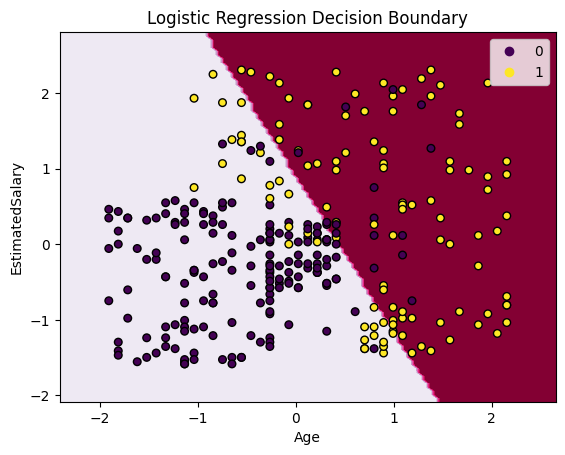

In [30]:
# Plot the decision boundary

x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model_logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='PuRd')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Logistic Regression Decision Boundary')
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=30, edgecolor = 'k')
plt.legend(handles=scatter.legend_elements()[0], labels=list(y_train.unique()))
plt.show()


## C.3 - Predict A New Data

Suppose there is a user that we will estimate whether he will buy the product or not with attributes below

* `Age` : 30
* `EstimatedSalary` : 40000

In [31]:
# Create New Data
new_data = {
    'Age': 30,
    'EstimatedSalary': 40000
}
new_data = pd.DataFrame([new_data])

# Feature Scaling
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-0.74561399, -0.86250872]])

In [32]:
# Predict using Logistic Regression

print('Prediction - Probability : ', model_logreg.predict_proba(new_data_scaled))
print('Prediction - Class       : ', model_logreg.predict(new_data_scaled))

Prediction - Probability :  [[0.97001152 0.02998848]]
Prediction - Class       :  [0]


Unfortunately, it is estimated that this user will not buy our product.